In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#import warnings
#warnings.filterwarnings("ignore")

# Plot colors
def get_region(id):
    id = int(id)
    if id == 186:
        return "green"
    elif id < 75:
        return "gray"
    elif id >= 75 and id < 150:
        return "red"
    elif id >= 150 and id < 250 and id != 186:
        return "blue"
    elif id >= 250:
        return "purple"
    
def plot_feature_importances(result, x, title, append,cutoff=0):
    '''
    plot the feature importances from results of permutation
    '''
    
    # Read the feature importance into a data frame and get the region from each feature
    df = pd.DataFrame({'feature_name': x.columns, 'feature_importance': result.importances_mean})
    df2 = df[df["feature_importance"] > cutoff].dropna().sort_values(by=['feature_importance'], ascending=False)
    colors = [get_region(i.split("_")[0]) for i in df2["feature_name"].values]
    
    # Plotting time
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data= df2, x='feature_importance', y='feature_name', palette=colors)
#    c = 0
    
#    # Get rid of things that are close to zero - keep in mind that this does not match what the mathematica plot does
#    # Need to update such that all avg values (minus std) greater than 0 are kept
#    for i in ax.containers:
#        if i.datavalues[0] < 0.0002:
#            i.datavalues[0] = np.round(i.datavalues[0],4)
#            ax.bar_label(i, color=colors[c])
#        c = c + 1
    # Increase font sizes
    plt.xticks(fontsize=14)  # Increase tick font size
    plt.yticks(fontsize=14)
    plt.xlabel("Feature Importance", fontsize=16, labelpad=10)  # Increase axis label size
    plt.ylabel("Feature Name", fontsize=16, labelpad=10)
    plt.title(title, fontsize=18, pad=15)  # Increase title size        
    # Annotate all bars in the barplot
    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f",fontsize=12)
        
    
    # Save the feature importance plot
    plt.savefig(f"permutation_feature_importances_{append}.jpg")
    
    return df2


def compute_and_plot_feature_importances(
    model, x, y, 
    title='Permutation Feature Importance', 
    append='all', 
    n_repeats=100, 
    random_state=0, 
    n_jobs=40,
    cutoff=0.0
):
    # Permutation feature importances
    result = permutation_importance(model, x, y, n_repeats=n_repeats, random_state=random_state,n_jobs=n_jobs)
    
    # Read the feature importance into a data frame and get the region from each feature
    df = pd.DataFrame({'feature_name': x.columns, 'feature_importance': result.importances_mean})
    df2 = df[df["feature_importance"] > cutoff].dropna().sort_values(by=['feature_importance'], ascending=False)
    colors = [get_region(i.split("_")[0]) for i in df2["feature_name"].values]
    
    # Plotting time
    plt.figure(figsize=(8, 8))
    ax = sns.barplot(data= df2, x='feature_importance', y='feature_name', palette=colors)
#    c = 0
    
#    # Get rid of things that are close to zero - keep in mind that this does not match what the mathematica plot does
#    # Need to update such that all avg values (minus std) greater than 0 are kept
#    for i in ax.containers:
#        if i.datavalues[0] < 0.0002:
#            i.datavalues[0] = np.round(i.datavalues[0],4)
#            ax.bar_label(i, color=colors[c])
#        c = c + 1
        
    print(f"containers length: {len(ax.containers)}")
    # Annotate all bars in the barplot
    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f")
        
    plt.title(title)
    
    # Save the feature importance plot
    plt.savefig(f"permutation_feature_importances_{append}.jpg")
    plt.show()
    
    # Return the feature importance values for the mathematica plot
    return df2, result

# Function to plot feature importances from RandomForest model
def plot_feature_importances_rf(model, x,cutoff=0.0, title='RF Feature Importance', append='all'):

    # Get feature importances from RandomForest model
    feature_importances = model.feature_importances_

    # Create a DataFrame
    df = pd.DataFrame({'feature_name': x.columns, 'feature_importance': feature_importances})

    # Filter out zero-importance features and sort in descending order
    df_filtered = df.query(f"feature_importance > {cutoff}").dropna().sort_values(by='feature_importance', ascending=False)

    # Assign colors based on feature names
    colors = [get_region(i.split("_")[0]) for i in df_filtered["feature_name"].values]


    # Plot feature importances
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(data=df_filtered, x='feature_importance', y='feature_name', palette=colors)
    # Increase font sizes
    plt.xticks(fontsize=14)  # Increase tick font size
    plt.yticks(fontsize=14)
    plt.xlabel("Feature Importance", fontsize=16, labelpad=10)  # Increase axis label size
    plt.ylabel("Feature Name", fontsize=16, labelpad=10)
    plt.title(title, fontsize=18, pad=15)  # Increase title size
    print(f"containers length: {len(ax.containers)}")
# Annotate all bars in the barplot
    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f",fontsize=12)
        
    plt.title(title)

    # Save the feature importance plot
    plt.savefig(f"RF_model_feature_importances_{append}.jpg")
    plt.show()

    return df_filtered

In [2]:
# Test dataset
df_test = pd.read_csv('../07_preprocess/model/X_test_dt10_4.csv')
X_test = df_test.iloc[:,:-2]
Y_test = df_test.iloc[:,-2]

# Train dataset
df_train = pd.read_csv('../07_preprocess/model/X_train_dt10_4.csv')
X_train = df_train.iloc[:,:-2]
Y_train = df_train.iloc[:,-2]


# Optimized Parameters
nestimators = 200
maxdepth = 3
leaf = 1641



In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()


X_scaled = StandardScaler().fit_transform(X_train)  # X is your feature matrix
X_pca = pca.fit_transform(X_scaled)


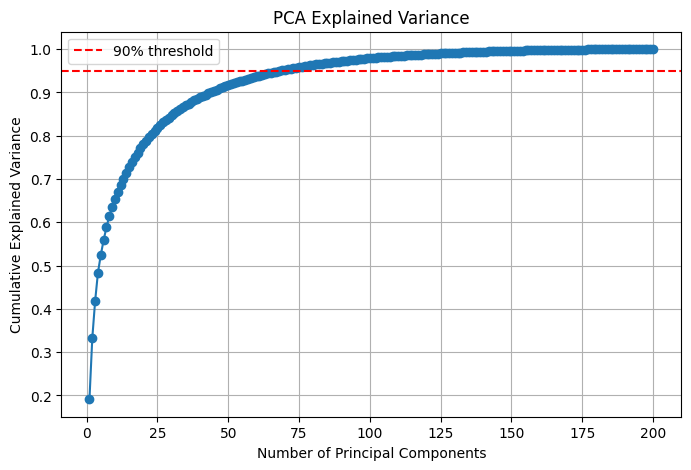

In [13]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.show()


## Correlation matrix

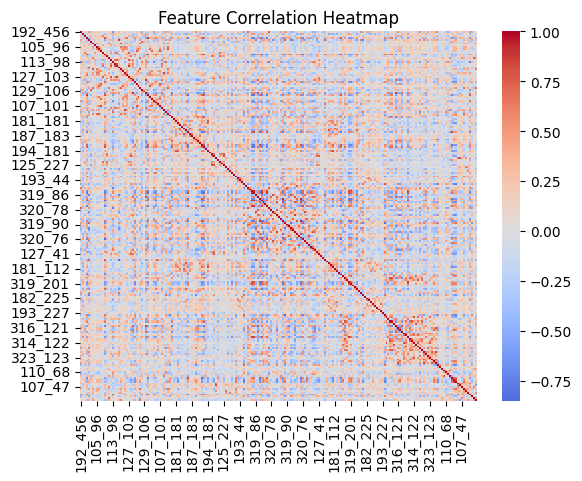

In [5]:
corr = X_train.corr()  # or X.corr(method='spearman') for non-linear relationships
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features to drop
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
X_uncorrelated = X_train.drop(columns=to_drop)
X_uncorrelated

,192_456,194_468,129_104,109_98,131_98,130_106,104_94,128_98,105_96,106_97,...,106_46,106_44,107_47,103_47,103_45,105_46,109_46,112_44,107_48,105_48
0,11.959592,14.611981,10.614050,10.101881,11.057159,11.938569,12.448572,12.459406,11.364911,11.483822,...,4.922908,9.572847,9.217326,10.664359,10.708164,5.170948,12.256719,14.288192,8.843725,9.414429
1,12.489167,13.540584,10.587786,10.721162,10.862146,10.789664,12.496773,12.119107,11.333798,11.635446,...,4.584081,9.135505,9.283891,10.312556,9.979089,5.425026,12.031864,13.348798,8.805131,9.958612
2,11.993231,13.697321,10.438404,10.191178,10.892964,11.638436,12.582206,12.347798,11.248907,12.185123,...,4.749691,9.405834,8.485404,10.397163,10.003677,5.297979,12.100762,12.886186,8.110187,9.577904
3,11.832443,13.467695,10.321848,10.485421,10.847757,10.799947,12.229875,12.475992,11.152975,12.118544,...,4.698938,9.885989,8.996287,10.100470,10.104331,4.757334,11.630687,13.078999,8.687022,9.479120
4,12.059545,14.144158,10.204361,10.529886,10.608803,11.911675,12.637143,13.040386,11.831955,11.843776,...,4.826108,9.061647,8.882932,10.494506,10.526889,5.720627,12.567367,13.615233,8.364887,9.936184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167491,17.369648,14.111539,11.245513,10.771431,13.909177,10.858707,13.024661,12.088283,11.497715,12.170960,...,5.147462,9.660127,9.618635,11.413902,10.425570,5.065567,13.506839,12.851310,8.741999,9.491460
167492,12.412440,15.531618,9.027574,9.095658,10.609691,10.928870,12.662532,13.121706,10.865367,11.893762,...,4.540013,8.638764,8.932259,10.282128,9.588520,5.439150,12.382927,13.304835,8.171423,9.729209
167493,9.495497,15.257273,9.417435,9.149023,10.010186,11.162853,12.597608,12.460598,11.233362,11.851142,...,4.714023,9.329925,9.000417,10.857498,10.364292,5.069700,12.470209,17.245854,8.790908,9.634138
167494,12.999738,10.741752,10.267180,12.016010,11.040186,11.103837,12.481396,11.535461,10.688394,12.165029,...,5.712345,10.460199,10.256679,10.928104,10.491129,5.074630,13.782294,14.933296,9.299676,9.144936


## VIF

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_train.shape[1])]
print(vif)

     feature        VIF
0    192_456   6.388752
1    194_468   4.134999
2    129_104   9.447080
3     109_98  25.178097
4     131_98  30.007626
..       ...        ...
195   105_46  10.616373
196   109_46  12.509972
197   112_44   7.722234
198   107_48  21.542937
199   105_48  29.056004

[200 rows x 2 columns]


In [15]:
print(vif[vif['VIF']<15])
print(vif[vif['VIF']<15].shape)

     feature        VIF
0    192_456   6.388752
1    194_468   4.134999
2    129_104   9.447080
7     128_98  10.516117
27    112_98  14.345523
..       ...        ...
193   103_47  12.552382
194   103_45   4.396269
195   105_46  10.616373
196   109_46  12.509972
197   112_44   7.722234

[84 rows x 2 columns]
(84, 2)


## Mutual Information

In [18]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, Y_train)  # Use mutual_info_regression for regression


In [20]:
mi_scores = pd.Series(mi, index=X_train.columns)
mi_scores

192_456    0.546913
194_468    0.187729
129_104    0.251273
109_98     0.480648
131_98     0.667886
             ...   
105_46     0.143304
109_46     0.564017
112_44     0.438358
107_48     0.037635
105_48     0.182248
Length: 200, dtype: float64

In [5]:
#joblib.dump(rf_pipeline,'model/final_pipeline_0225.pkl')

['model/final_pipeline_0225.pkl']